<a href="https://colab.research.google.com/github/evroth/gsb545repo/blob/main/PA_NN_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Activity: Neural Networks

Using neural networks in SciKit to predict wine prices.

## The Data

In [31]:
import pandas as pd

df = pd.read_csv("cleansingWine.csv")

<ipython-input-31-17c6a7e33c4a>:3: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleansingWine.csv")


In [2]:
df.dtypes

Unnamed: 0      int64
id              int64
name           object
producer       object
nation         object
local1         object
local2         object
local3         object
local4         object
varieties1     object
varieties2     object
varieties3     object
varieties4     object
varieties5     object
varieties6     object
varieties7     object
varieties8     object
varieties9     object
varieties10    object
varieties11    object
varieties12    object
type           object
use            object
abv            object
degree         object
sweet          object
acidity        object
body           object
tannin         object
price           int64
year            int64
ml              int64
dtype: object

In [32]:
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
df.sample(5)

,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
9950,"Cono Sur, Bicicleta Chardonnay",Cono Sur,Chile,Central Valley,NaN,NaN,NaN,Chardonnay,NaN,NaN,...,Table,NaN,NaN,SWEET1,ACIDITY3,BODY3,TANNIN1,18000,2016,750
2421,Vin Fou Rose,Henri Maire,France,Bordeaux,NaN,NaN,NaN,Poulsard,Trousseau,Pinot Noir,...,Appetizer,NaN,NaN,SWEET2,ACIDITY3,BODY2,TANNIN1,23000,0,750
4539,"Shingleback, The Gate Shiraz",Shingleback,Australia,South Australia,McLaren Vale,NaN,NaN,Syrah & Shiraz,NaN,NaN,...,Table,14.5,16~18,SWEET1,ACIDITY3,BODY4,TANNIN5,100000,2004,750
4850,Chateau Latour Camblanes,Chateau Latour Camblanes,France,Bordeaux,Premieres Cotes de Bordeaux,NaN,NaN,Merlot,Cabernet Sauvignon,NaN,...,Table,12.5,16~18,SWEET1,ACIDITY3,BODY3,TANNIN3,0,2006,750
17767,Poggio Nicchiaia - Vermentino Costa Toscana,SRL BrandLand SRL,Italy,Toscana,NaN,NaN,NaN,Vermentino,NaN,NaN,...,Table,NaN,NaN,SWEET1,ACIDITY4,BODY2,TANNIN1,0,2017,750


## Cleaning the Data

Drop the wines that have no price and year equal to zero.

In [33]:
df = df[df['year'] != 0]
df = df[df['price'] != 0]

In [5]:
df.describe()

,price,year,ml
count,1.106900e+04,11069.000000,11069.000000
mean,1.688665e+05,2012.357395,745.967567
std,3.291202e+05,4.974603,95.796495
min,3.900000e+03,1976.000000,100.000000
25%,4.500000e+04,2009.000000,750.000000
50%,7.800000e+04,2014.000000,750.000000
75%,1.680000e+05,2017.000000,750.000000
max,8.000000e+06,2020.000000,6000.000000


Recode missing values for some of the variables that are "NaN" as none because we can still capture some value from the variable instead of just dropping rows or not using that variable.

In [34]:
df.isna().sum()

name               0
producer           0
nation             0
local1           223
local2          4766
local3          8845
local4         11069
varieties1       132
varieties2      7254
varieties3      8970
varieties4     10333
varieties5     10862
varieties6     11014
varieties7     11052
varieties8     11061
varieties9     11065
varieties10    11065
varieties11    11066
varieties12    11067
type              14
use                6
abv             3681
degree          3681
sweet              2
acidity            0
body               0
tannin             0
price              0
year               0
ml                 0
dtype: int64

In [35]:
df['local1'].fillna(value="None", inplace=True)
df['local2'].fillna(value="None", inplace=True)
df['local3'].fillna(value="None", inplace=True)
df['local4'].fillna(value="None", inplace=True)
df['varieties1'].fillna(value="None", inplace=True)
df['varieties2'].fillna(value="None", inplace=True)
df['varieties3'].fillna(value="None", inplace=True)
df = df.drop(columns=['varieties4', 'varieties5', 'varieties6', 'varieties7','varieties8','varieties9','varieties10','varieties11','varieties12'])
df.dropna(subset=['type'], inplace=True)
df.dropna(subset=['use'], inplace=True)
df.dropna(subset=['sweet'], inplace=True)
df['abv'].fillna(value="None", inplace=True)
df['degree'].fillna(value="None", inplace=True)

In [36]:
df.describe(include = ['object'])

,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,type,use,abv,degree,sweet,acidity,body,tannin
count,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047
unique,11025,2883,27,161,241,140,1,261,189,147,6,9,119,64,5,5,5,5
top,"Sine Qua Non, Shakti Grenache",Sine Qua Non,France,California,None,None,None,Cabernet Sauvignon,None,None,Red,Table,None,None,SWEET1,ACIDITY3,BODY3,TANNIN3
freq,2,52,3466,1488,4753,8827,11047,1634,7235,8949,7643,9777,3672,3672,10165,5823,4584,3650


## Exploratory Analysis

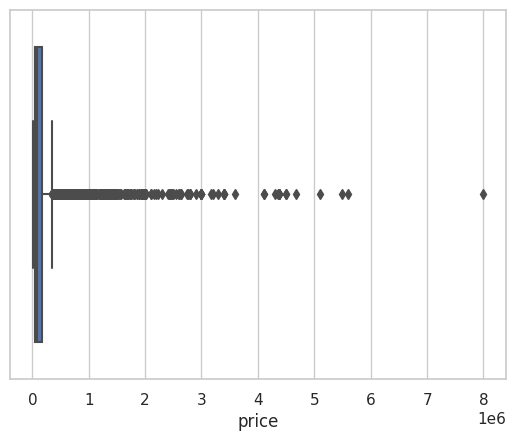

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.boxplot(x = df['price'], data = df)
plt.show()

We will need to scale this variable to build the neural net.

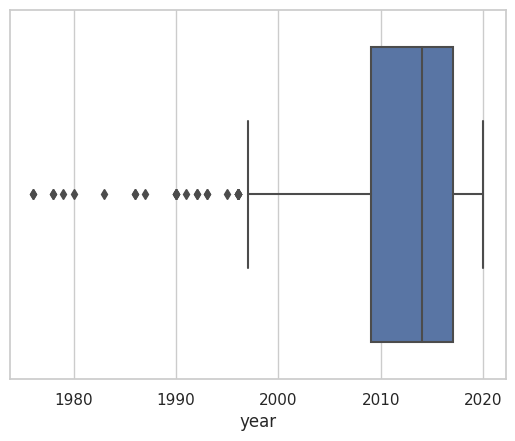

In [ ]:
sns.boxplot(x = df['year'], data = df)
plt.show()

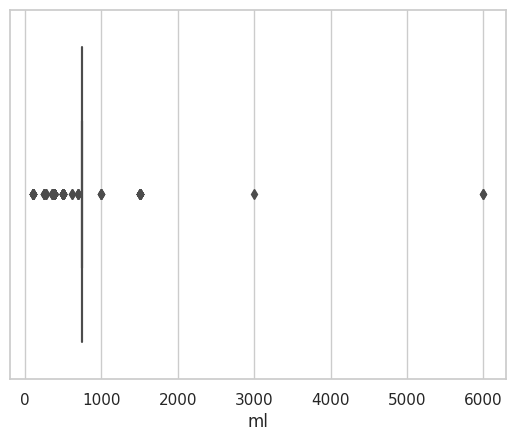

In [ ]:
sns.boxplot(x = df['ml'], data = df)
plt.show()

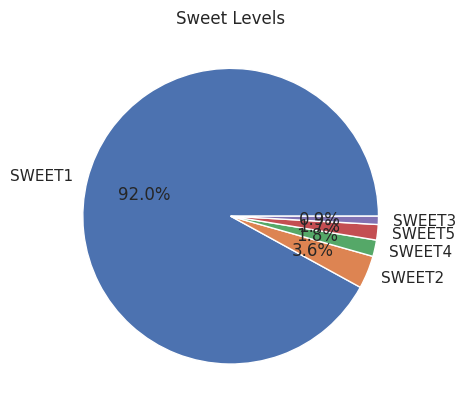

In [ ]:
sweet_counts = df['sweet'].value_counts()

# create a pie chart of the 'acidity' column with labels and a title
plt.pie(sweet_counts, labels=sweet_counts.index, autopct='%1.1f%%')
plt.title('Sweet Levels')

# display the pie chart
plt.show()

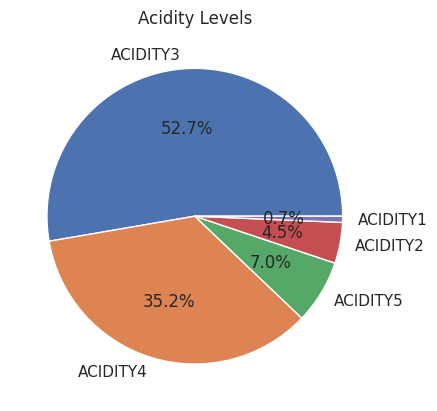

In [ ]:
acidity_counts = df['acidity'].value_counts()

# create a pie chart of the 'acidity' column with labels and a title
plt.pie(acidity_counts, labels=acidity_counts.index, autopct='%1.1f%%')
plt.title('Acidity Levels')

# display the pie chart
plt.show()

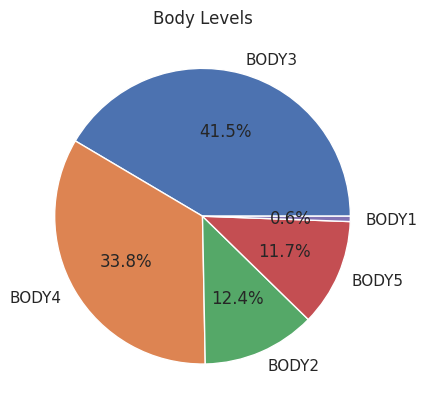

In [ ]:
body_counts = df['body'].value_counts()

# create a pie chart of the 'acidity' column with labels and a title
plt.pie(body_counts, labels=body_counts.index, autopct='%1.1f%%')
plt.title('Body Levels')

# display the pie chart
plt.show()

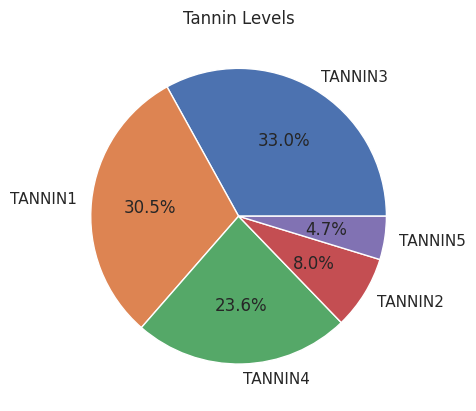

In [ ]:
tannin_counts = df['tannin'].value_counts()

# create a pie chart of the 'acidity' column with labels and a title
plt.pie(tannin_counts, labels=tannin_counts.index, autopct='%1.1f%%')
plt.title('Tannin Levels')

# display the pie chart
plt.show()

<ipython-input-40-9a6eaca6e553>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nation_counts = nation_counts[top_four].append(pd.Series(other_count, index=['Other']))


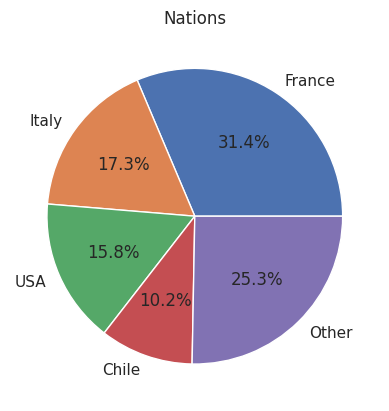

In [ ]:
nation_counts = df['nation'].value_counts()
top_four = nation_counts.index[:4]
other_count = nation_counts.loc[~nation_counts.index.isin(top_four)].sum()
nation_counts = nation_counts[top_four].append(pd.Series(other_count, index=['Other']))

# create a pie chart of the 'nation' column with labels and a title
plt.pie(nation_counts, labels=nation_counts.index, autopct='%1.1f%%')
plt.title('Nations')

# display the pie chart
plt.show()

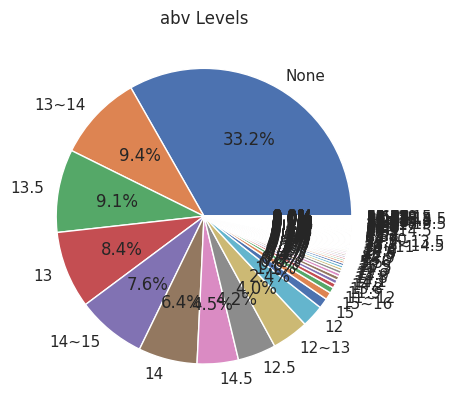

In [ ]:
abv_counts = df['abv'].value_counts()

# create a pie chart of the 'acidity' column with labels and a title
plt.pie(abv_counts, labels=abv_counts.index, autopct='%1.1f%%')
plt.title('abv Levels')

# display the pie chart
plt.show()

How ugly this pie chart is shows us that this variable may be a good one to put into our model because it currently is a catagorical variable and there are different ways it is labeled.

In [37]:
def extract_average_abv(abv_value):
    if '~' in abv_value:
        # split the 'abv_value' into two parts using the tilde character
        left_num, right_num = abv_value.split('~')
        # convert the two parts into floats and take their average
        return str((float(left_num) + float(right_num)) / 2)
    else:
        # if the 'abv_value' does not contain a tilde, return the original value as a float
        return str(abv_value)

# apply the 'extract_average_abv' function to the 'abv' column to create a new column with the extracted averages
df['modded_abv'] = df['abv'].apply(extract_average_abv)

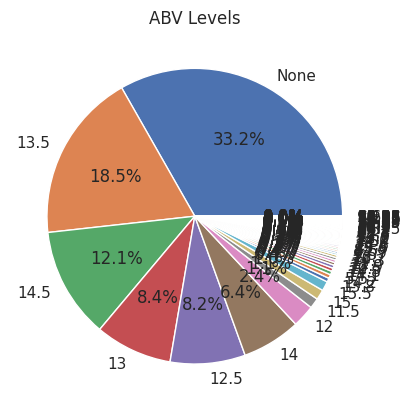

In [11]:
modded_abv_counts = df['modded_abv'].value_counts()

# create a pie chart of the 'acidity' column with labels and a title
plt.pie(modded_abv_counts, labels=modded_abv_counts.index, autopct='%1.1f%%')
plt.title('ABV Levels')

# display the pie chart
plt.show()

This may be a little better, but with trying to keep the rows with missing abv values, we have to keep this variable is a catagorical type. We no longer can say 14 is closer to 14.5 than 10 since they are distinct groups. This variable may end up not being helpful and be dropped

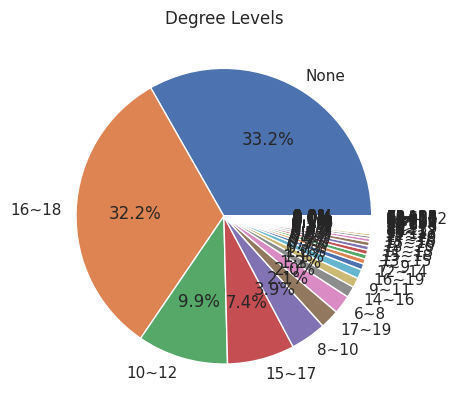

In [ ]:
degree_counts = df['degree'].value_counts()

# create a pie chart of the 'acidity' column with labels and a title
plt.pie(degree_counts, labels=degree_counts.index, autopct='%1.1f%%')
plt.title('Degree Levels')

# display the pie chart
plt.show()

Also an ugly variable to work with.

In [38]:
df = df.drop(columns=['name'])
df = df.drop(columns=['abv'])

Code to draw neural net...

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_neural_net(num_inputs, num_hidden_layers, num_hidden_nodes):
    # Create a new directed graph
    G = nx.DiGraph()

    # Add the input layer nodes
    for i in range(num_inputs):
        G.add_node("Input {}".format(i+1), layer=1)

    # Add the hidden layer nodes
    for layer in range(2, num_hidden_layers+2):
        for i in range(num_hidden_nodes):
            G.add_node("Hidden Layer {} Node {}".format(layer-1, i+1), layer=layer)

    # Add the output layer node
    G.add_node("Output", layer=num_hidden_layers+2)

    # Add the edges between the input layer and the first hidden layer
    for i in range(num_inputs):
        for j in range(num_hidden_nodes):
            G.add_edge("Input {}".format(i+1), "Hidden Layer 1 Node {}".format(j+1))

    # Add the edges between the hidden layers
    for layer in range(2, num_hidden_layers+1):
        for i in range(num_hidden_nodes):
            for j in range(num_hidden_nodes):
                G.add_edge("Hidden Layer {} Node {}".format(layer-1, i+1), "Hidden Layer {} Node {}".format(layer, j+1))

    # Add the edges between the last hidden layer and the output layer
    for i in range(num_hidden_nodes):
        G.add_edge("Hidden Layer {} Node {}".format(num_hidden_layers, i+1), "Output")

    # Draw the graph
    pos = {}
    layers = sorted(set(nx.get_node_attributes(G, 'layer').values()))
    num_layers = len(layers)
    max_nodes_in_layer = max([len([n for n in G.nodes() if nx.get_node_attributes(G, 'layer')[n] == layer]) for layer in layers])
    for layer in layers:
        layer_nodes = [n for n in G.nodes() if nx.get_node_attributes(G, 'layer')[n] == layer]
        layer_index = layers.index(layer)
        layer_height = num_layers - layer_index
        start_y = -max_nodes_in_layer/2
        for index, node in enumerate(layer_nodes):
            pos[node] = (layer_index+1, start_y + index + 0.5*(max_nodes_in_layer - len(layer_nodes)) + 0.5)

    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes() - {"Output"}, node_color="lightblue")
    nx.draw_networkx_nodes(G, pos, nodelist=["Output"], node_color="lightgreen")
    nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

    plt.axis("off")
    plt.show()


## Data Preprocessing

In [39]:
df.dtypes

producer      object
nation        object
local1        object
local2        object
local3        object
local4        object
varieties1    object
varieties2    object
varieties3    object
type          object
use           object
degree        object
sweet         object
acidity       object
body          object
tannin        object
price          int64
year           int64
ml             int64
modded_abv    object
dtype: object

Level Encoding and Standardizing

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# label encoding for categorical variables
le = LabelEncoder()
df['producer'] = le.fit_transform(df['producer'])
df['nation'] = le.fit_transform(df['nation'])
df['local1'] = le.fit_transform(df['local1'])
df['local2'] = le.fit_transform(df['local2'])
df['local3'] = le.fit_transform(df['local3'])
df['local4'] = le.fit_transform(df['local4'])
df['varieties1'] = le.fit_transform(df['varieties1'])
df['varieties2'] = le.fit_transform(df['varieties2'])
df['varieties3'] = le.fit_transform(df['varieties3'])
df['type'] = le.fit_transform(df['type'])
df['use'] = le.fit_transform(df['use'])
df['degree'] = le.fit_transform(df['degree'])
df['sweet'] = le.fit_transform(df['sweet'])
df['acidity'] = le.fit_transform(df['acidity'])
df['body'] = le.fit_transform(df['body'])
df['tannin'] = le.fit_transform(df['tannin'])
df['modded_abv'] = le.fit_transform(df['modded_abv'])

In [42]:
df

,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,type,use,degree,sweet,acidity,body,tannin,price,year,ml,modded_abv
0,60,5,104,147,88,0,32,37,72,2,6,35,0,3,4,3,220000,2014,750,56
1,60,5,104,147,88,0,32,98,24,2,6,31,0,2,3,3,110000,2016,750,56
7,398,8,9,147,88,0,131,31,82,2,6,31,0,2,1,2,21000,2011,750,37
8,398,8,9,147,88,0,210,157,78,5,6,61,0,3,1,0,21000,2010,750,8
9,398,8,129,103,88,0,32,117,82,2,6,31,0,2,1,2,19000,2017,750,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21586,2778,8,10,57,88,0,184,117,82,2,6,63,0,3,2,2,109000,2017,750,101
21597,2034,5,36,147,88,0,210,117,82,5,2,56,0,3,1,0,40000,2020,750,37
21602,1860,26,158,147,88,0,44,134,82,3,2,3,0,2,1,0,40000,2020,750,19
21603,1860,26,31,157,136,0,44,117,82,5,2,3,0,2,1,0,40000,2020,750,19


An important note is that it may be important to actually divide the data into train and test set and scale each individually. For cross validation I assumed to just scale all at the beginning since it will be random samples.

## Building a Neural Net

In [43]:
# Separate features and target variable
X = df.drop(['price'], axis=1)
y = df['price']

Model 1:

In [44]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# define the model
model = MLPRegressor(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Neg MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Neg MAE: -143954.505 (3882.335)


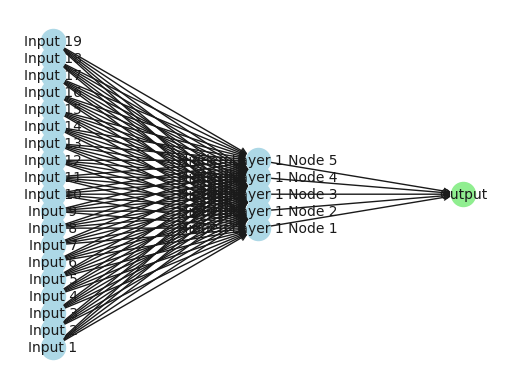

In [85]:
draw_neural_net(19,1,5)

In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an MLPRegressor object
reg = MLPRegressor(hidden_layer_sizes=(6,), max_iter=10000, random_state=42)

# train the neural network using the training data
reg.fit(X_train, y_train)

# evaluate the performance of the neural network on the testing data
score = reg.score(X_test, y_test)
print("R^2: {:.2f}".format(score))


R^2: 0.14


In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error
# make predictions on the testing data
y_pred = reg.predict(X_test)

# calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: {:.2f}".format(rmse))

RMSE: 337938.43


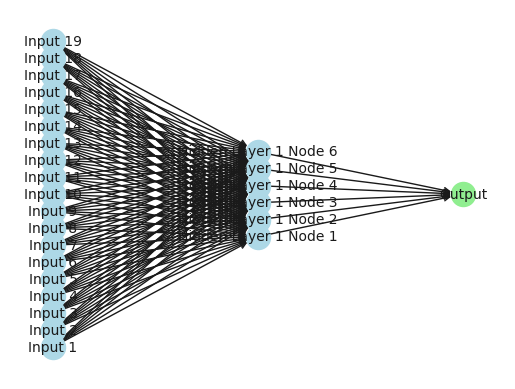

In [86]:
draw_neural_net(19,1,6)

Model 2: 100 nodes in hidden layer

In [67]:
# create an MLPRegressor object
reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, random_state=42)

# train the neural network using the training data
reg.fit(X_train, y_train)

# evaluate the performance of the neural network on the testing data
score = reg.score(X_test, y_test)
print("R^2: {:.2f}".format(score))

R^2: 0.17


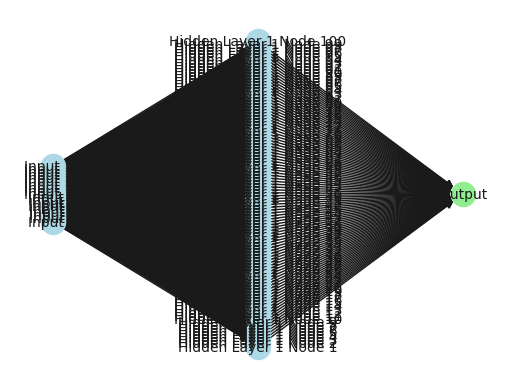

In [87]:
draw_neural_net(19,1,100)

Model 3: log of price, see if that makes a difference

In [52]:
df_2 = df
df_2['price'] = np.log(df_2['price'])

In [53]:
# Separate features and target variable
X2 = df_2.drop(['price'], axis=1)
y2 = df_2['price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

With logged price:

In [63]:
# create an MLPRegressor object
reg = MLPRegressor(hidden_layer_sizes=(4,), max_iter=10000, random_state=42)

# train the neural network using the training data
reg.fit(X2_train, y2_train)

# evaluate the performance of the neural network on the testing data
score = reg.score(X2_test, y2_test)
print("R^2: {:.2f}".format(score))

R^2: 0.35


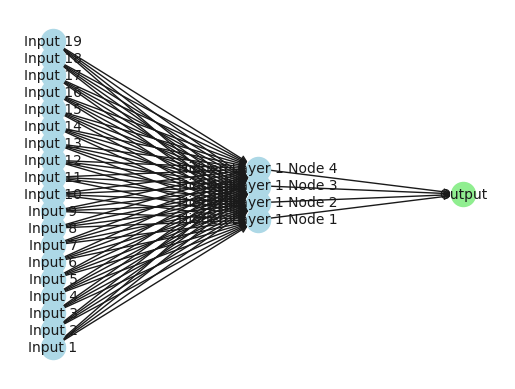

In [88]:
draw_neural_net(19,1,4)

RMSE for above model:

In [68]:
# make predictions on the testing data
y2_pred = reg.predict(X2_test)

# calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))

print("RMSE: {:.2f}".format(rmse))

RMSE: 201010.93


This model is the best one I have been able to build so far. R^2 of .35 and RMSE of 201,010

Same model specs but with normal price:

In [66]:
# create an MLPRegressor object
reg = MLPRegressor(hidden_layer_sizes=(4,), max_iter=10000, random_state=42)

# train the neural network using the training data
reg.fit(X_train, y_train)

# evaluate the performance of the neural network on the testing data
score = reg.score(X_test, y_test)
print("R^2: {:.2f}".format(score))

R^2: 0.11


Not nearly as good.

Scaling the variables.

In [73]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [74]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

In [77]:
# create an MLPRegressor object
reg = MLPRegressor(hidden_layer_sizes=(1000,),activation = 'relu' , solver = 'adam', max_iter=10000, alpha = .001, random_state=42)

# train the neural network using the training data
reg.fit(X2_train, y2_train)

# evaluate the performance of the neural network on the testing data
score = reg.score(X2_test, y2_test)
print("R^2: {:.2f}".format(score))

R^2: 0.59


I am not printing a drawing of this one, too messy

## Other Models

XGBoost

In [91]:
from xgboost import XGBRegressor
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the model
model = XGBRegressor()

# train the neural network using the training data
model.fit(X2_train, y2_train)

# evaluate the performance of the neural network on the testing data
score = model.score(X2_test, y2_test)
print("R^2: {:.2f}".format(score))

R^2: 0.74


This is already much better than the best neural net I was able to put together.

## Conclusion

In summary, the best neural net I was able to put together with this data to predict wine prices resulted in an R^2 of .59, this was with all the variables scaled with scale standard. Although this was the best neural net, the XGboost model reported an R^2 of .74, with the same scaled and cleaned data. 

I believe it would be possible to make both models a lot better but there are so many things to tune it would take a good amount more time and playing around with the data.